In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
img = cv2.imread("/content/drive/MyDrive/image_notebooks/coins.bmp", 0)


In [4]:
dft = cv2.dft(np.float32(img), flags = cv2.DFT_COMPLEX_OUTPUT)

In [5]:
dft_shift = np.fft.fftshift(dft)        # shifting dft to the center

In [6]:
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

In [7]:
rows , cols = img.shape
crow , ccol = int(rows/2) , int(cols/2)       # center

In [8]:
mask = np.ones((rows , cols, 2), np.uint8)         # 2 channels, dft has 2 channels

# Circular mask

In [9]:
r = 80
center = [crow, ccol]
x, y= np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 0


In [10]:
fshift= dft_shift * mask


In [11]:
fshift_mask_mag = 2000 * np.log(cv2.magnitude(fshift[:, : , 0], fshift[: , : , 1])+1)

 **convert dft imageback**

In [12]:
f_ishift = np.fft.ifftshift(fshift)     # unshift the shift
img_back = cv2.idft(f_ishift)           # inverse dft
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])      # calculate the magnitude back

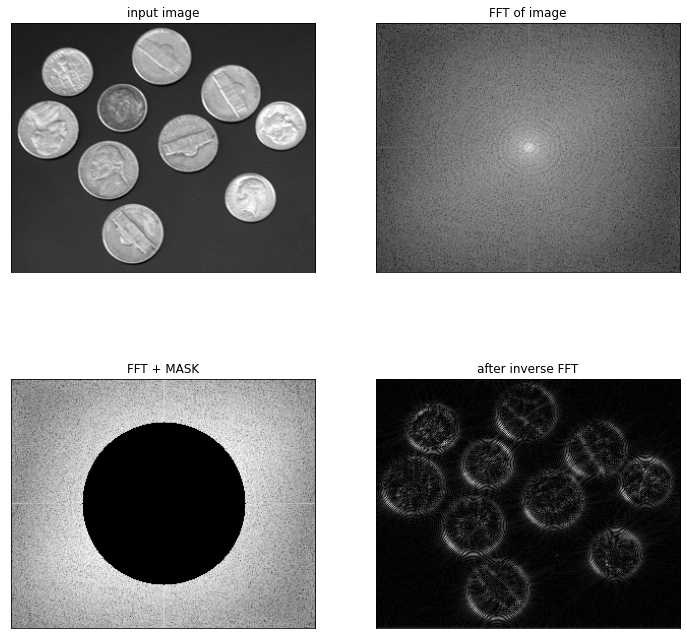

In [13]:
plt.figure(figsize=(12, 12))

plt.subplot(221)
plt.imshow(img, cmap='gray')
plt.title('input image')
plt.xticks([]), plt.yticks([]);

plt.subplot(222)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('FFT of image');
plt.xticks([]), plt.yticks([]);

plt.subplot(223)
plt.imshow(fshift_mask_mag, cmap='gray')
plt.title('FFT + MASK');
plt.xticks([]), plt.yticks([]);

plt.subplot(224)
plt.imshow(img_back, cmap='gray')
plt.title('after inverse FFT');
plt.xticks([]), plt.yticks([]);